<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/Majorana_Kitaev_chain2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

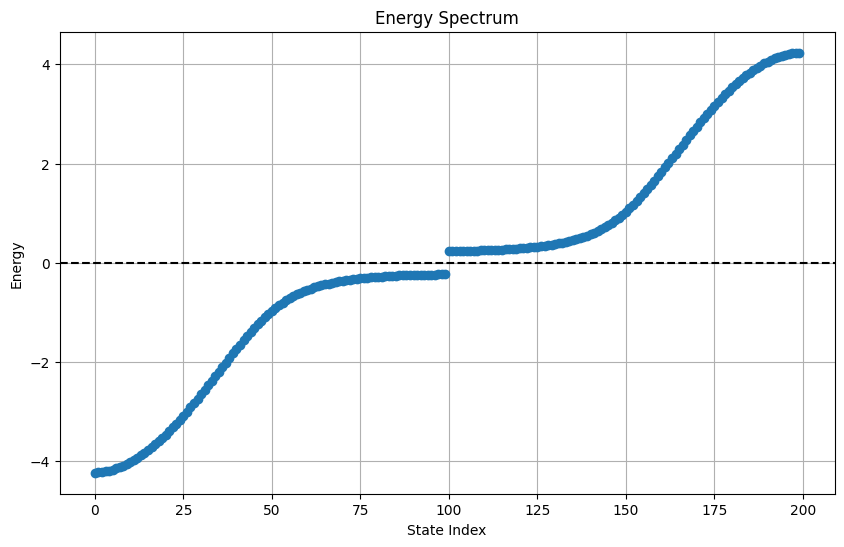

Zero-energy modes indices: []
Number of zero-energy modes: 0


In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

# Parameters
mu = 0  # Chemical potential
t = 1   # Hopping parameter (sets energy scale)
Delta = 1  # Superconducting pairing potential
Vz = 1  # Zeeman energy
N = 100  # Number of sites

# Hamiltonian matrix initialization
H = np.zeros((2*N, 2*N), dtype=complex)  # Factor of 2 for particle-hole space

# Build the Hamiltonian
for i in range(N):
    # On-site potential
    H[i, i] = -mu + Vz
    H[i+N, i+N] = mu - Vz

    # Superconducting pairing
    if i < N-1:
        H[i, i+N+1] = H[i+1, N+i] = Delta
        H[i+N, i+1] = H[N+i+1, i] = -Delta

    # Hopping terms
    if i < N-1:
        H[i, i+1] = H[i+N, i+N+1] = -t
        H[i+1, i] = H[i+N+1, i+N] = -t

# Diagonalize the Hamiltonian
eigenvalues, eigenvectors = la.eigh(H)

# Plot the spectrum
plt.figure(figsize=(10, 6))
plt.plot(eigenvalues, 'o')
plt.title('Energy Spectrum')
plt.xlabel('State Index')
plt.ylabel('Energy')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='--')  # Zero energy reference line
plt.show()

# Identify zero-energy modes
zero_energy_threshold = 1e-3
zero_modes_index = np.where(abs(eigenvalues) < zero_energy_threshold)[0]

print(f"Zero-energy modes indices: {zero_modes_index}")
print(f"Number of zero-energy modes: {len(zero_modes_index)}")

# Visualization of Majorana modes (if present)
if len(zero_modes_index) > 0:
    for idx in zero_modes_index:
        plt.figure(figsize=(10, 6))
        plt.plot(abs(eigenvectors[:, idx])**2, label=f"State {idx}")
        plt.title(f"Localization of Majorana Mode (State {idx})")
        plt.xlabel('Site Index')
        plt.ylabel('Probability Density')
        plt.legend()
        plt.grid(True)
        plt.show()
